# pytorch 튜토리얼

## 인공신경망을 위한 파이썬 프레임워크 pytorch를 배워보고 간단한 예제인 mnist를 구현해봅니다.



In [1]:
"""
pytorch를 준비해봅시다.
"""

import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [32]:
"""
mnist를 다운받아봅시다.
"""

import torchvision
from torchvision import datasets, transforms

batch_size = 64
seperator_size = 8
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)


3 6 3 6 5 4 5 8
3 8 2 1 7 3 0 9
3 3 8 6 8 9 1 1
5 0 8 2 5 7 1 3
1 3 9 4 4 3 1 3
7 3 5 5 0 9 1 5
8 3 7 1 9 6 8 3
1 7 9 2 6 5 9 9


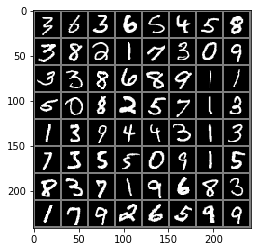

In [32]:
"""
데이터를 직접 봅시다.
"""

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

    # get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('\n'.join(' '.join('%d' % labels[seperator_size * i + j] for j in range(seperator_size)) for i in range(batch_size // seperator_size)))

In [ ]:
"""
신경망을 설계해봅시다.
"""

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 28 * 28 * 1 --> 24 * 24 * 10 --> 12 * 12 * 10
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        # 12 * 12 * 10 --> 8 * 8 * 20 --> 4 * 4 * 20
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x))

In [ ]:
"""
신경망을 적용시켜 학습해봅시다.
"""

lr = 1e-2
momentum = 0.5
net = Net()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

def train(epoch):
    net.train()
    for idx, (data, target) in enumerate(train_loader):
        data = Variable(data)
        target = Variable(target)
        optimizer.zero_grad()
        output = net(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        if idx % 10 == 0:
            print('TRAINING...' + epoch + '')